In [50]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt

## Clustering

In [2]:
df = pd.read_csv("./src/bank_cleaned.csv")

In [3]:
profile= df.iloc[:,[1,2,3,4,6,7]]
profile.sample(10)

,job,marital,education,default,housing,loan
711,technician,divorced,secondary,no,yes,no
1782,technician,single,secondary,no,yes,no
4489,management,married,tertiary,no,no,yes
7376,management,married,secondary,no,yes,no
145,services,married,secondary,no,yes,no
10321,management,married,tertiary,no,no,no
10053,technician,married,tertiary,no,yes,no
1829,admin.,single,tertiary,no,yes,no
5796,retired,divorced,primary,no,no,no
9208,services,married,secondary,no,yes,no


#### Replacing NaN

In [19]:
nan=pd.DataFrame(profile.isna().sum())
nan = nan.rename(columns={0 : "NaN_count"})
nan

,NaN_count
job,64
marital,0
education,491
default,0
housing,0
loan,0


In [24]:
job_mode = profile["job"].mode()[0]
profile["job"] = profile["job"].fillna(job_mode)
education_mode = profile["education"].mode()[0]
profile["education"] = profile["education"].fillna(education_mode)

#### One Hot Encoding

In [36]:
M=pd.get_dummies(data=profile,drop_first=False).astype("uint8")
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11156 entries, 0 to 11155
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_admin.           11156 non-null  uint8
 1   job_blue-collar      11156 non-null  uint8
 2   job_entrepreneur     11156 non-null  uint8
 3   job_housemaid        11156 non-null  uint8
 4   job_management       11156 non-null  uint8
 5   job_retired          11156 non-null  uint8
 6   job_self-employed    11156 non-null  uint8
 7   job_services         11156 non-null  uint8
 8   job_student          11156 non-null  uint8
 9   job_technician       11156 non-null  uint8
 10  job_unemployed       11156 non-null  uint8
 11  marital_divorced     11156 non-null  uint8
 12  marital_married      11156 non-null  uint8
 13  marital_single       11156 non-null  uint8
 14  education_primary    11156 non-null  uint8
 15  education_secondary  11156 non-null  uint8
 16  education_tertiary   1

#### Dice function to measure distance between 2 features

In [39]:
def Dice(col1,col2):
    return (0.5*np.sum((col1 - col2)**2))

In [40]:
## Transforming DataFrame into an array
MN=M.values
MN

array([[1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [41]:
## Array filled with zeros as a template of the Dice Matrix
D=np.zeros(shape=(M.shape[1],M.shape[1]))

In [42]:
## Filling the D matrix with the calculated Dice values
for c1 in range(M.shape[1]):
  for c2 in range(M.shape[1]):
    D[c1,c2]=Dice(MN[:,c1],MN[:,c2])
D=np.sqrt(D)
D

array([[ 0.        , 40.48456496, 28.82707061, 28.35489376, 44.51965858,
        32.49615362, 29.4872854 , 33.59315406, 29.10326442, 39.73034105,
        29.0774827 , 33.63034344, 56.24499978, 44.16446535, 37.08099244,
        50.26430145, 48.40970977, 69.5593272 , 27.19374928, 54.86802347,
        50.67050424, 66.46051459, 34.07345007],
       [40.48456496,  0.        , 33.70459909, 33.30165161, 47.8225888 ,
        36.89173349, 34.27097898, 37.86159004, 33.9411255 , 43.39930875,
        33.91902121, 38.32753579, 53.01414905, 47.6497639 , 32.06243908,
        52.47380299, 52.61653732, 67.55368236, 31.85121662, 57.32800363,
        47.86961458, 64.90762667, 36.9459064 ],
       [28.82707061, 33.70459909,  0.        , 17.34935157, 38.45776905,
        23.51595203, 19.14418972, 25.009998  , 18.54723699, 32.79481666,
        18.50675552, 27.71281292, 55.70906569, 43.24927745, 29.54657341,
        54.70374759, 43.31858723, 73.07872467, 15.41103501, 54.21715596,
        51.36633139, 68.9492

In [45]:
## Squareform so the matrix has the distance between 2 features only once
VD = squareform(D)
VD

array([40.48456496, 28.82707061, 28.35489376, 44.51965858, 32.49615362,
       29.4872854 , 33.59315406, 29.10326442, 39.73034105, 29.0774827 ,
       33.63034344, 56.24499978, 44.16446535, 37.08099244, 50.26430145,
       48.40970977, 69.5593272 , 27.19374928, 54.86802347, 50.67050424,
       66.46051459, 34.07345007, 33.70459909, 33.30165161, 47.8225888 ,
       36.89173349, 34.27097898, 37.86159004, 33.9411255 , 43.39930875,
       33.91902121, 38.32753579, 53.01414905, 47.6497639 , 32.06243908,
       52.47380299, 52.61653732, 67.55368236, 31.85121662, 57.32800363,
       47.86961458, 64.90762667, 36.9459064 , 17.34935157, 38.45776905,
       23.51595203, 19.14418972, 25.009998  , 18.54723699, 32.79481666,
       18.50675552, 27.71281292, 55.70906569, 43.24927745, 29.54657341,
       54.70374759, 43.31858723, 73.07872467, 15.41103501, 54.21715596,
       51.36633139, 68.9492567 , 28.70540019, 38.10511777, 22.93468988,
       18.42552577, 24.46425965, 17.80449381, 32.38054972, 17.76

In [47]:
## Clustering hierarchy with ward
cah=ward(VD)
cah

array([[  3.        ,  18.        ,  14.57737974,   2.        ],
       [  2.        ,  23.        ,  16.9754725 ,   3.        ],
       [ 10.        ,  24.        ,  18.18882441,   4.        ],
       [  8.        ,  25.        ,  18.61451047,   5.        ],
       [  6.        ,  26.        ,  19.6511238 ,   6.        ],
       [  5.        ,  27.        ,  26.68555878,   7.        ],
       [ 17.        ,  21.        ,  27.50454508,   2.        ],
       [  7.        ,  28.        ,  29.23977233,   8.        ],
       [  4.        ,  16.        ,  31.18493226,   2.        ],
       [  1.        ,  14.        ,  32.06243908,   2.        ],
       [ 11.        ,  30.        ,  33.00631253,   9.        ],
       [  0.        ,  22.        ,  34.07345007,   2.        ],
       [ 33.        ,  34.        ,  36.14071824,  11.        ],
       [  9.        ,  35.        ,  40.90760098,  12.        ],
       [ 32.        ,  36.        ,  44.62182362,  14.        ],
       [ 15.        ,  20

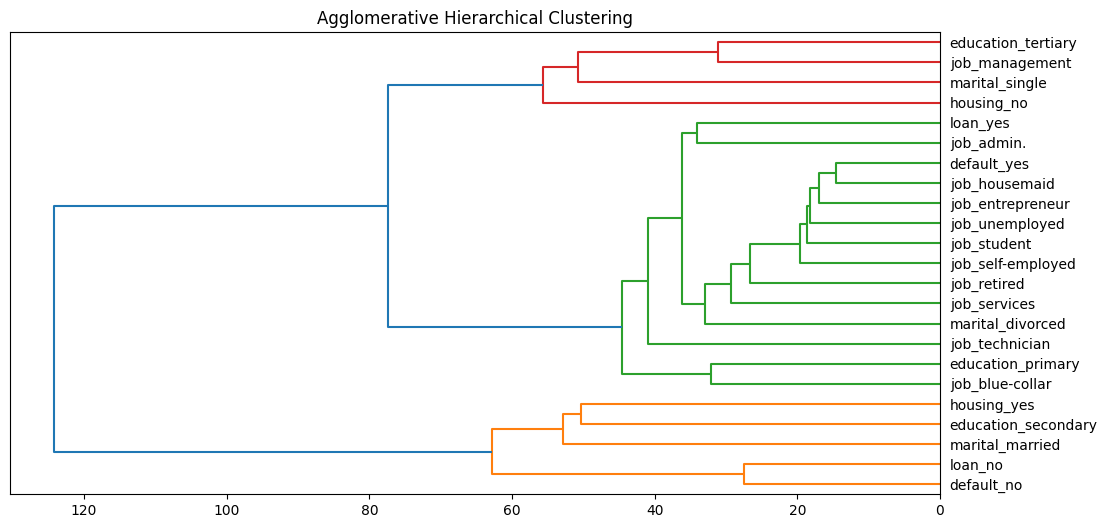

In [52]:
## Visualisation of the hierarchy with a Dendrogram
plt.figure(figsize=(12,6))
plt.title("Agglomerative Hierarchical Clustering")
dendrogram(Z=cah,labels=M.columns, orientation="left", color_threshold=70)
plt.show()

We can identify 2 to 3 clusters that allow us to outline broad stereotypes (from top to bottom):

- Single manager with higher education and a renter
- A journey marked by setbacks or instability
- Married, with a mortgage